<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Anomaly_detection_using_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2020-12-06 18:44:05--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  10.5MB/s    in 1.0s    

2020-12-06 18:44:07 (10.5 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [3]:
!ls -alrt

total 36800
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 1 root root     4096 Dec  2 22:04 sample_data
drwxr-xr-x 1 root root     4096 Dec  2 22:04 .config
drwxr-xr-x 1 root root     4096 Dec  6 18:40 ..
drwxr-xr-x 1 root root     4096 Dec  6 18:44 .


In [4]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > final_ecg.txt

In [5]:
!head final_ecg.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [6]:
df1 = pd.read_csv('final_ecg.txt', sep='  ', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [8]:
df1.shape

(5000, 141)

In [9]:
df1.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [10]:
df1 = df1.add_prefix('d')

In [11]:
df1.columns

Index(['d0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9',
       ...
       'd131', 'd132', 'd133', 'd134', 'd135', 'd136', 'd137', 'd138', 'd139',
       'd140'],
      dtype='object', length=141)

In [12]:
df1['d0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: d0, dtype: int64

In [13]:
df1.describe()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,...,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,-0.586326,-0.434430,-0.337621,-0.258235,-0.184443,-0.120015,-0.070396,-0.041849,-0.037049,-0.041243,-0.048908,-0.060176,-0.070725,-0.085491,-0.101144,-0.116070,-0.134461,-0.155811,-0.177542,-0.200685,-0.224244,-0.246686,-0.271476,-0.290321,-0.304461,-0.315111,-0.316851,-0.313070,-0.303238,...,0.946527,1.051337,1.138071,1.187551,1.201909,1.190866,1.154605,1.086347,0.986863,0.864419,0.720300,0.570000,0.428955,0.319734,0.242586,0.181059,0.134708,0.109781,0.093630,0.081028,0.065780,0.047326,0.025409,0.004531,-0.009790,-0.019087,-0.026208,-0.029561,0.000637,0.086588,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,0.592049,0.493606,0.426206,0.393553,0.382488,0.386315,0.400830,0.415267,0.423797,0.429734,0.434976,0.441768,0.447727,0.454600,0.461603,0.472726,0.483574,0.492048,0.503468,0.516169,0.530030,0.543061,0.552285,0.560649,0.564906,0.566459,0.560789,0.548964,0.536229,...,0.520027,0.574633,0.614855,0.623050,0.608319,0.582721,0.553923,0.531272,0.507226,0.485600,0.483479,0.511334,0.546391,0.565580,0.571998,0.573798,0.584480,0.589680,0.591613,0.597117,0.603953,0.610288,0.619812,0.633101,0.649239,0.667657,0.680713,0.693871,0.751844,0.920052,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,-4.040526,-3.724538,-3.264576,-3.222345,-3.263484,-3.219212,-3.202187,-3.147504,-3.459917,-4.102102,-4.311241,-4.099888,-3.614973,-3.822298,-3.795567,-3.690817,-3.542485,-3.631665,-3.587112,-3.452215,-4.074752,-4.137454,-4.059662,-3.626646,-2.829471,-3.585866,-4.003401,-3.900724,-3.325329,...,-2.662170,-2.634950,-2.634768,-2.591663,-2.446476,-2.234175,-2.431403,-2.681604,-2.864706,-3.415656,-3.497624,-3.091282,-2.608510,-2.383204,-2.678883,-3.305661,-3.179590,-3.311559,-3.501555,-4.007212,-4.199563,-3.335678,-3.127603,-3.042532,-3.116177,-3.972320,-4.754057,-4.290016,-3.802469,-4.014642,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,-0.935730,-0.704797,-0.557938,-0.457267,-0.392099,-0.346567,-0.329879,-0.332123,-0.342879,-0.359587,-0.373523,-0.392615,-0.415157,-0.441247,-0.470702,-0.501586,-0.538227,-0.570103,-0.616792,-0.650610,-0.695386,-0.735151,-0.770997,-0.799982,-0.8121

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(df1.values, df1.values[:,0:1],test_size=0.2, random_state=111)

In [15]:
scaler = MinMaxScaler()
scaled_data = scaler.fit(train_data)

In [16]:
train_data.shape

(4000, 141)

In [17]:
test_data.shape

(1000, 141)

In [18]:
scaled_train_data = scaled_data.transform(train_data)
scaled_test_data = scaled_data.transform(test_data)

In [19]:
scaled_train_data

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [20]:
scaled_test_data

array([[0.        , 0.51111741, 0.43489881, ..., 0.6249658 , 0.60768678,
        0.3698076 ],
       [0.25      , 0.5197631 , 0.58901577, ..., 0.39627694, 0.3318268 ,
        0.24251847],
       [0.25      , 0.62648979, 0.59723298, ..., 0.3331001 , 0.4585061 ,
        0.41617464],
       ...,
       [0.25      , 0.13521482, 0.12299443, ..., 0.66536863, 0.65893605,
        0.59395691],
       [0.        , 0.52987595, 0.50665907, ..., 0.47105684, 0.52833952,
        0.38464608],
       [0.        , 0.72652016, 0.76264168, ..., 0.80449517, 0.7151365 ,
        0.60004511]])

In [21]:
trained_normal_data = pd.DataFrame(scaled_train_data).add_prefix('d').query('d0 == 0').values[:,1:]
trained_anomaly_data = pd.DataFrame(scaled_train_data).add_prefix('d').query('d0 > 0').values[:,1:]

In [22]:
test_normal_data = pd.DataFrame(scaled_test_data).add_prefix('d').query('d0 == 0').values[:,1:]
test_anomaly_data = pd.DataFrame(scaled_test_data).add_prefix('d').query('d0 > 0').values[:,1:]

In [23]:
print(trained_normal_data.shape)

(2356, 140)


In [24]:
print(test_normal_data.shape)

(563, 140)


In [25]:
print(trained_anomaly_data.shape)

(1644, 140)


In [26]:
print(test_anomaly_data.shape)

(437, 140)


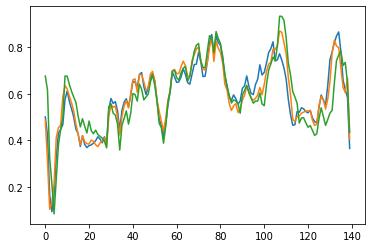

In [27]:
plt.plot(trained_normal_data[0])
plt.plot(trained_normal_data[1])
plt.plot(trained_normal_data[2])

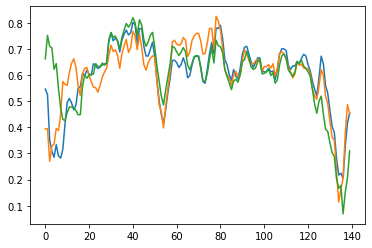

In [28]:
plt.plot(trained_anomaly_data[0])
plt.plot(trained_anomaly_data[1])
plt.plot(trained_anomaly_data[2])

In [29]:
#as auto encoder we do the process of both upsampling and downsampling - reconstruction error for the anomaly data will be really high than the normal data
#sigmoid and relu to learn the non linear functions
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

In [30]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [31]:
model=AutoEncoder()
early_stopping =tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer='adam', loss='mae')

In [32]:
history = model.fit(trained_normal_data,trained_normal_data,
                    epochs=50,
                    batch_size=128,
                    validation_data=(scaled_train_data[:,1:],scaled_train_data[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 0s 13ms/step - loss: 0.1278 - val_loss: 0.1111
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0810 - val_loss: 0.0864
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.0785
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0490 - val_loss: 0.0764
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0480 - val_loss: 0.0768
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0478 - val_loss: 0.0756
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0754
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0474 - val_loss: 0.0747
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0470 - val_loss: 0.0739
Epoch 10/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.0714
Epoch 11/50
19/19 

In [33]:
encoder_output = model.encoder(test_normal_data).numpy()
decoder_output = model.decoder(encoder_output).numpy()

In [34]:
encoder_output.shape

(563, 8)

In [35]:
decoder_output.shape

(563, 140)

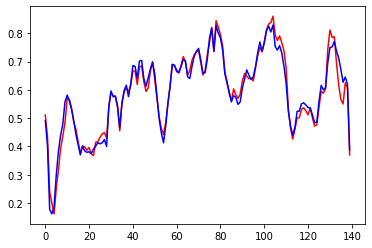

In [36]:
plt.plot(test_normal_data[0],'r')
plt.plot(decoder_output[0],'b')

In [37]:
encoder_output_a = model.encoder(test_anomaly_data).numpy()
decoder_output_b = model.decoder(encoder_output_a).numpy()

In [38]:
encoder_output_a.shape

(437, 8)

In [39]:
decoder_output_b.shape

(437, 140)

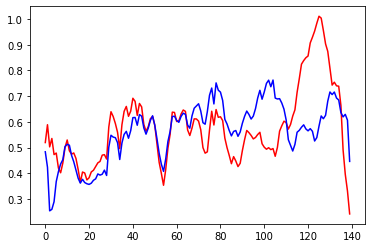

In [40]:
plt.plot(test_anomaly_data[0],'r')
plt.plot(decoder_output_b[0],'b')

(array([ 3., 16., 38., 69., 61., 71., 57., 45., 42., 34., 16., 14., 13.,
        10.,  9.,  6.,  6.,  5.,  6.,  7.,  6.,  4.,  4.,  3.,  1.,  2.,
         2.,  3.,  1.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.01030959, 0.01228034, 0.01425109, 0.01622184, 0.01819258,
        0.02016333, 0.02213408, 0.02410483, 0.02607558, 0.02804633,
        0.03001707, 0.03198782, 0.03395857, 0.03592932, 0.03790007,
        0.03987081, 0.04184156, 0.04381231, 0.04578306, 0.04775381,
        0.04972455, 0.0516953 , 0.05366605, 0.0556368 , 0.05760755,
        0.05957829, 0.06154904, 0.06351979, 0.06549054, 0.06746129,
        0.06943203, 0.07140278, 0.07337353, 0.07534428, 0.07731503,
        0.07928577, 0.08125652, 0.08322727, 0.08519802, 0.08716877,
        0.08913951, 0.09111026, 0.09308101, 0.09505176, 0.09702251,
        0.09899326, 0.100964  , 0.10293475, 0.1049055 , 0.10687625,
        0.108847  ]),
 <a list of 50

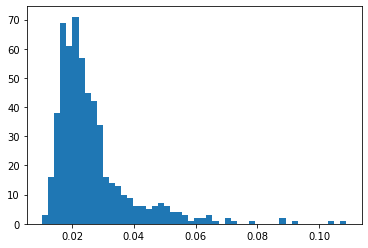

In [41]:
reconstruction = model.predict(test_normal_data)
train_loss = tf.keras.losses.mae(reconstruction, test_normal_data)


plt.hist(train_loss,bins=50)

In [42]:
mean = np.mean(train_loss)

In [43]:
mean

0.026580273893939417

In [44]:
std = np.std(train_loss)

In [45]:
std

0.012829593279995

In [46]:
threshold = mean + 2*std

In [47]:
threshold

0.052239460453929416

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  4.,  0.,  3.,  1.,
         9., 13., 23., 27., 57., 48., 45., 57., 42., 35., 23., 18.,  6.,
         6.,  1.,  2.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0336344 , 0.03679751, 0.03996062, 0.04312374, 0.04628685,
        0.04944996, 0.05261308, 0.05577619, 0.0589393 , 0.06210242,
        0.06526553, 0.06842864, 0.07159175, 0.07475487, 0.07791798,
        0.08108109, 0.08424421, 0.08740732, 0.09057043, 0.09373355,
        0.09689666, 0.10005977, 0.10322289, 0.106386  , 0.10954911,
        0.11271222, 0.11587534, 0.11903845, 0.12220156, 0.12536468,
        0.12852779, 0.1316909 , 0.13485402, 0.13801713, 0.14118024,
        0.14434335, 0.14750647, 0.15066958, 0.15383269, 0.15699581,
        0.16015892, 0.16332203, 0.16648515, 0.16964826, 0.17281137,
        0.17597449, 0.1791376 , 0.18230071, 0.18546382, 0.18862694,
        0.19179005]),
 <a list of 50

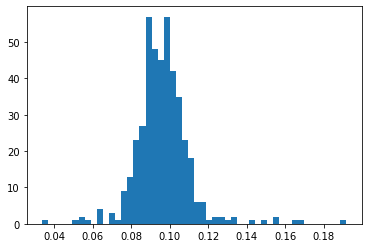

In [48]:
reconstruction_a = model.predict(test_anomaly_data)
train_loss_b = tf.keras.losses.mae(reconstruction_a, test_anomaly_data)


plt.hist(train_loss_b,bins=50)

In [49]:
mean2 = np.mean(train_loss_b)

In [50]:
mean2

0.09629646470137024

In [51]:
std2 = np.std(train_loss_b)

In [52]:
std2

0.014368513753319438

In [53]:
threshold2 = mean2 + 2*std2

In [54]:
threshold2

0.1250334922080091

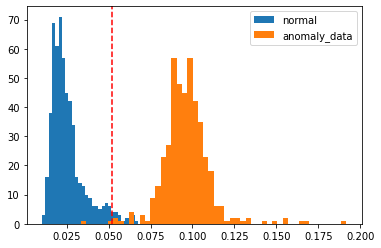

In [55]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_b, bins=50, label='anomaly_data')
plt.axvline(threshold,color='r', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

In [56]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [57]:
prediction = tf.math.less(train_loss, threshold)

In [58]:
tf.math.count_nonzero(prediction)

<tf.Tensor: shape=(), dtype=int64, numpy=534>

In [59]:
prediction.shape

TensorShape([563])

In [60]:
tf.math.less(train_loss_b, threshold)

<tf.Tensor: shape=(437,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fal

In [61]:
prediction2 = tf.math.greater(train_loss_b, threshold)

In [62]:
tf.math.count_nonzero(prediction2)

<tf.Tensor: shape=(), dtype=int64, numpy=436>

In [63]:
prediction2.shape

TensorShape([437])